In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
data_df=pd.read_csv('gdrive/My Drive/DeepLearning/FETAL_HEALTH.csv')
data_df.sample(10)

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health
465,0.000,0.002,0.001,0.001,0.0,0.0,78,23,2
265,0.000,0.000,0.006,0.000,0.0,0.0,30,0,2
1378,0.003,0.000,0.006,0.006,0.0,0.0,25,0,1
1387,0.006,0.000,0.009,0.000,0.0,0.0,39,0,1
497,0.016,0.084,0.002,0.000,0.0,0.0,34,0,1
451,0.007,0.003,0.000,0.000,0.0,0.0,58,3,1
1839,0.002,0.005,0.003,0.006,0.0,0.0,58,0,1
786,0.000,0.011,0.000,0.000,0.0,0.0,51,9,1
873,0.003,0.000,0.005,0.000,0.0,0.0,44,18,1
565,0.007,0.000,0.005,0.003,0.0,0.0,45,2,1


In [6]:
data_df.shape

(2126, 9)

In [7]:
duplicate_rows_data = data_df[data_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)
data_df.drop_duplicates(inplace=True)

number of duplicate rows:  (56, 9)


In [8]:
# Checking for missing values and categorical variables in the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2125
Data columns (total 9 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   accelerations                                           2070 non-null   float64
 1   fetal_movement                                          2070 non-null   float64
 2   uterine_contractions                                    2070 non-null   float64
 3   light_decelerations                                     2070 non-null   float64
 4   severe_decelerations                                    2070 non-null   float64
 5   prolongued_decelerations                                2070 non-null   float64
 6   abnormal_short_term_variability                         2070 non-null   int64  
 7   percentage_of_time_with_abnormal_long_term_variability  2070 non-null   int64  
 8   fetal_health                           

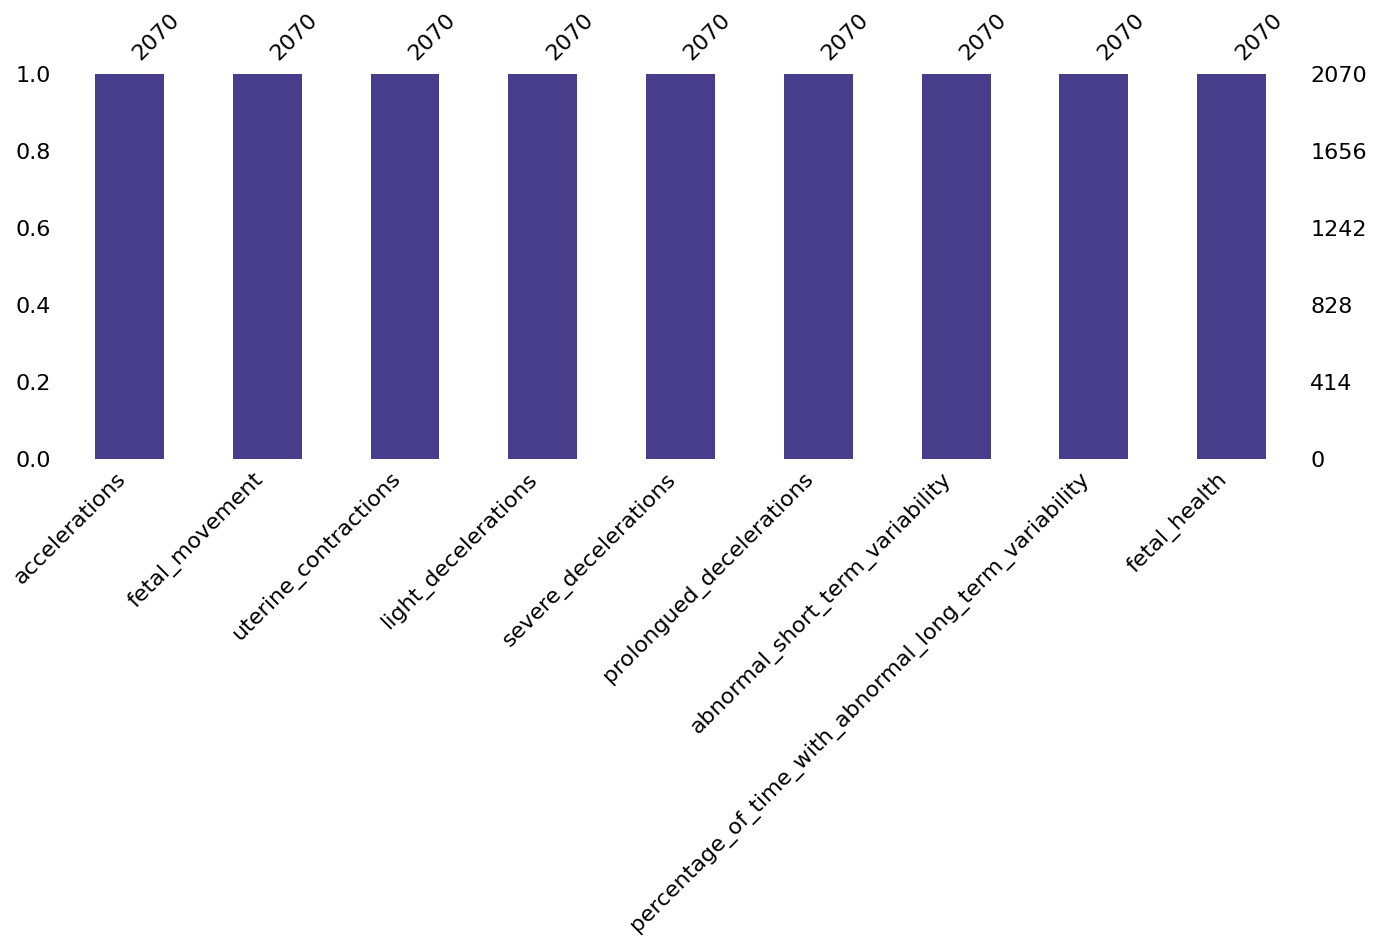

In [9]:
# Visualizing the missing values in the dataset, 
missing_values = msno.bar(data_df, figsize = (16,5),color = "#483D8B")

In [10]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
accelerations,2070.0,0.003213,0.003870,0.0,0.000,0.002,0.006,0.019
fetal_movement,2070.0,0.009689,0.047269,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2070.0,0.004363,0.002938,0.0,0.002,0.004,0.007,0.015
light_decelerations,2070.0,0.001903,0.002965,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2070.0,0.000003,0.000058,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2070.0,0.000159,0.000593,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2070.0,46.954589,17.176728,12.0,32.000,48.000,61.000,87.000
percentage_of_time_with_abnormal_long_term_variability,2070.0,9.933333,18.453772,0.0,0.000,0.000,11.000,91.000
fetal_health,2070.0,1.306280,0.615499,1.0,1.000,1.000,1.000,3.000


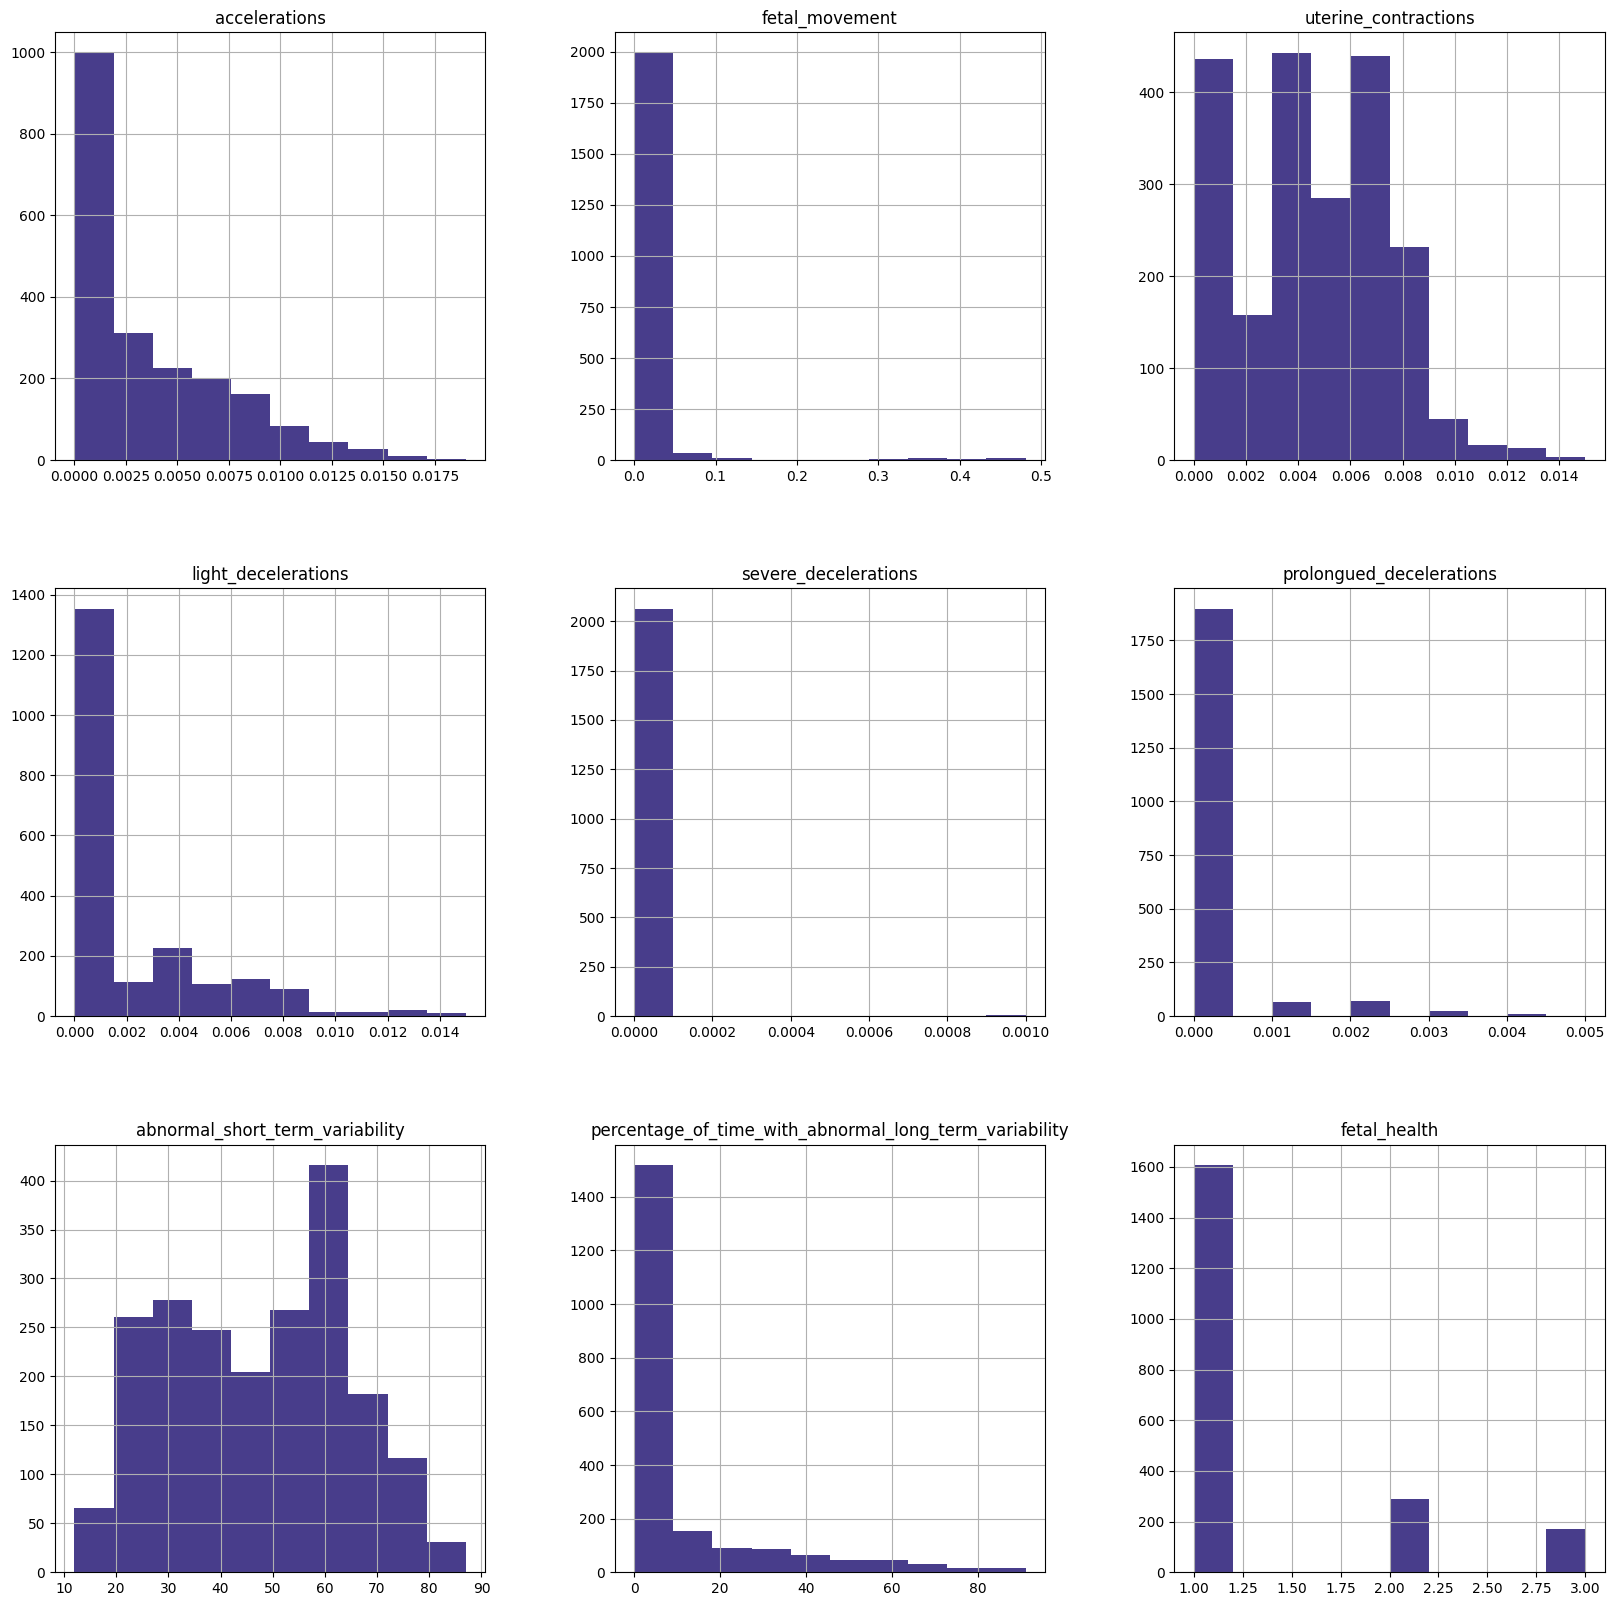

In [11]:
# Evaluating distributions of the features 
hist_plot = data_df.hist(figsize = (20,20), color = "#483D8B")

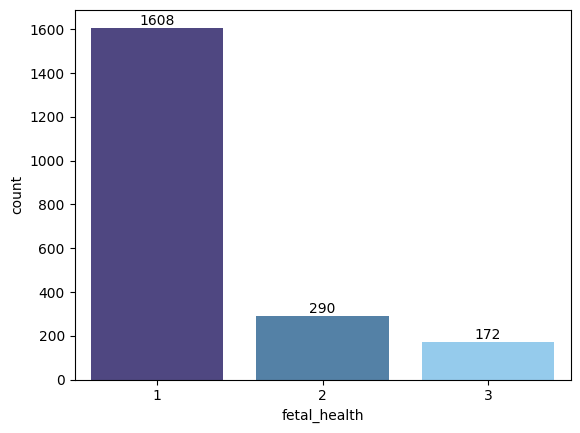

In [12]:
# Evaluating the target column and checking for imbalance of the data, 
colors=["#483D8B","#4682B4", "#87CEFA"]
ax = sns.countplot(data= data_df, x="fetal_health", palette=colors)
ax.bar_label(ax.containers[0])
plt.show()

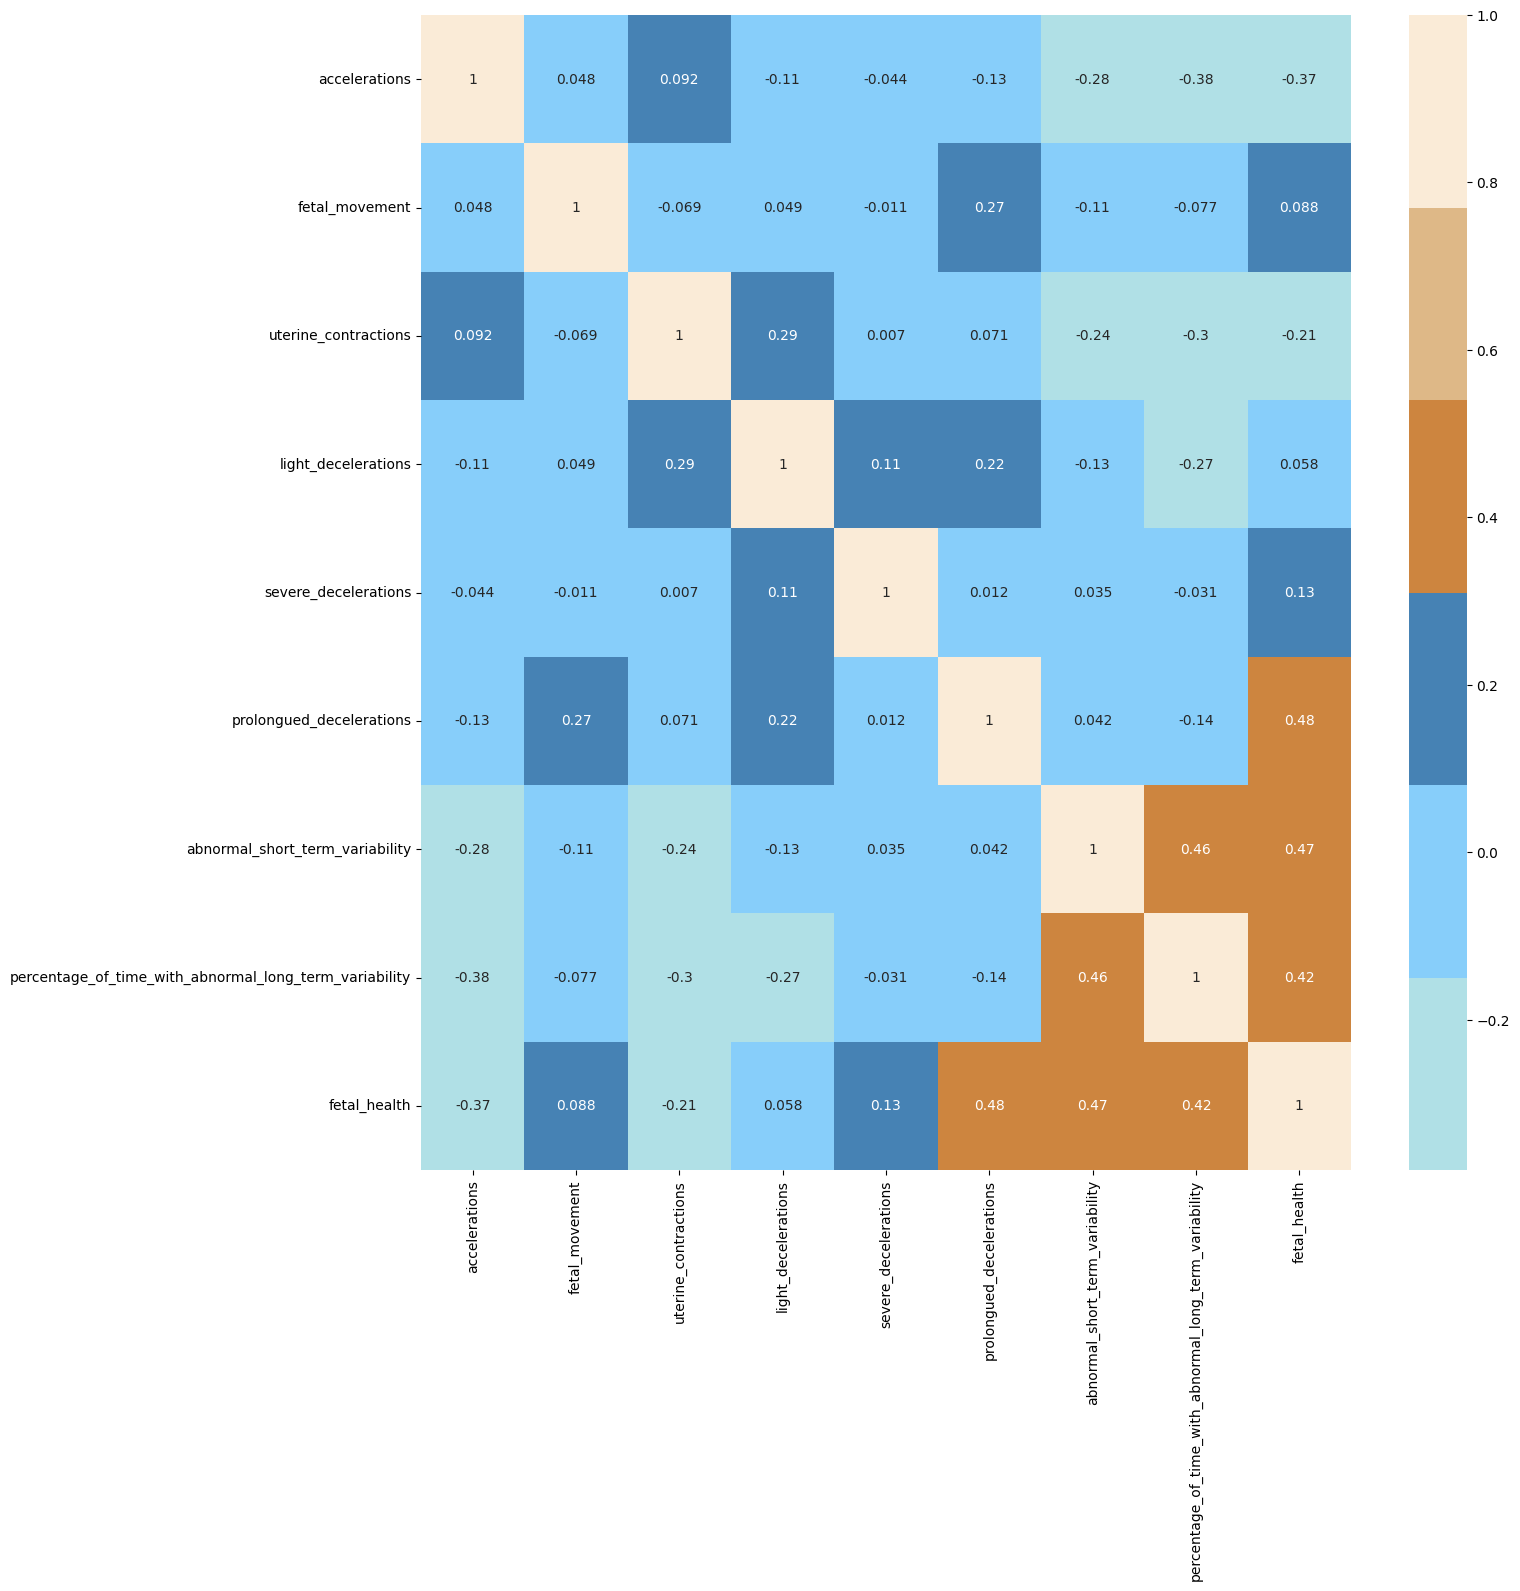

In [13]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#B0E0E6", "#87CEFA", "#4682B4", "#CD853F", "#DEB887", "#FAEBD7"])

corrmat= data_df.corr()

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat,cmap=cols,annot=True)
plt.show()

In [14]:
# Defining independent and dependent attributes in training and test sets
X=data_df.drop(["fetal_health"],axis=1)
y=data_df["fetal_health"]

In [15]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
accelerations,2070.0,-4.805603e-17,1.000242,-0.830473,-0.830473,-0.313535,0.720343,4.080445
fetal_movement,2070.0,6.865147e-17,1.000242,-0.205031,-0.205031,-0.205031,-0.141550,9.973135
uterine_contractions,2070.0,-8.238177e-17,1.000242,-1.485430,-0.804477,-0.123525,0.897903,3.621711
light_decelerations,2070.0,0.000000e+00,1.000242,-0.642147,-0.642147,-0.642147,0.369968,4.418427
severe_decelerations,2070.0,-4.805603e-17,1.000242,-0.058250,-0.058250,-0.058250,-0.058250,17.167245
prolongued_decelerations,2070.0,-8.238177e-17,1.000242,-0.268244,-0.268244,-0.268244,-0.268244,8.170440
abnormal_short_term_variability,2070.0,1.304378e-16,1.000242,-2.035489,-0.870841,0.060877,0.817898,2.331939
percentage_of_time_with_abnormal_long_term_variability,2070.0,-2.746059e-17,1.000242,-0.538412,-0.538412,-0.538412,0.057816,4.394021


In [16]:
features=['accelerations', 'fetal_movement','uterine_contractions', 'light_decelerations', 'severe_decelerations',
           'prolongued_decelerations', 'abnormal_short_term_variability', 
             'percentage_of_time_with_abnormal_long_term_variability']

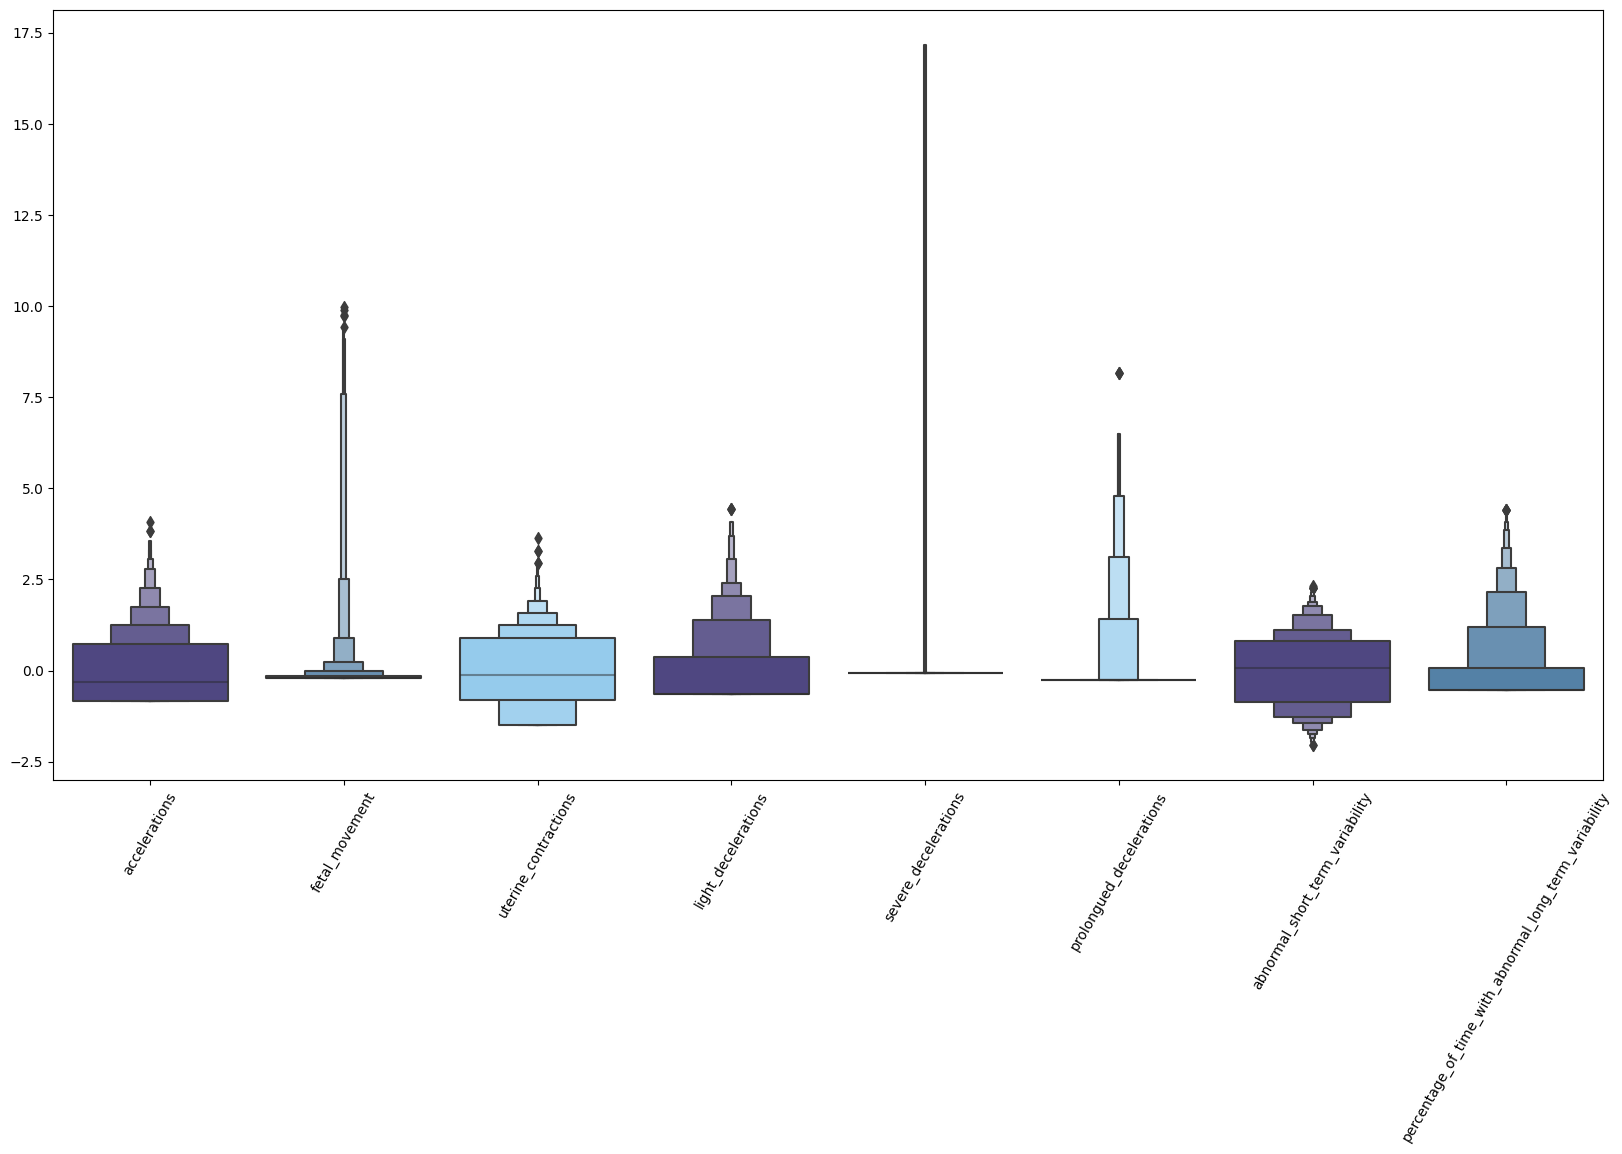

In [17]:
#Plotting the scaled features using boxen plots
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

In [18]:
# Splitting the training and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

**Membuat Machine Learning Model Menggunakan Algoritma Random Forest**

In [19]:
# Building pipelines of model for various classifiers

pipeline_lr = Pipeline([('lr_classifier',LogisticRegression())])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])

pipeline_gbcl = Pipeline([('gbcl_classifier',GradientBoostingClassifier())])

pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_gbcl, pipeline_rf, pipeline_knn]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Gradient Boost', 3:'RandomForest', 4: 'KNN'}

# Fitting the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [20]:

cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=12)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.817029 
Decision Tree: 0.899758 
Gradient Boost: 0.925121 
RandomForest: 0.926932 
KNN: 0.869565 


In [21]:
# Model dasar RF dengan parameter default:

random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train, y_train)
print(f"Baseline Random Forest: {round(random_forest_mod.score(X_test, y_test), 3)}")

pred_random_forest = random_forest_mod.predict(X_test)

Baseline Random Forest: 0.969


In [22]:
# Cross validate Random forest model
scores_RF = cross_val_score(random_forest, X_train, y_train, cv = 10, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 2)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 2)}")

Scores(Cross validate) for Random forest model:
[0.90963855 0.92168675 0.94578313 0.93373494 0.92771084 0.93373494
 0.94545455 0.94545455 0.92727273 0.91515152]
CrossValMeans: 0.93
CrossValStandard Deviation: 0.01


In [23]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]             
              }

In [24]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF,
                                cv=2,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [25]:
# Fit model with train data
GridSearchCV_RF.fit(X_train, y_train);

Fitting 2 folds for each of 36 candidates, totalling 72 fits


In [26]:
best_estimator_RF = GridSearchCV_RF.best_estimator_
print(f"Best estimator for RF model:\n{best_estimator_RF}")

Best estimator for RF model:
RandomForestClassifier(min_samples_split=6, n_estimators=200)


In [27]:
best_params_RF = GridSearchCV_RF.best_params_
print(f"Best parameter values for RF model:\n{best_params_RF}")

Best parameter values for RF model:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


In [28]:
best_score_RF = GridSearchCV_RF.best_score_
print(f"Best score for RF model: {round(best_score_RF, 3)}")

Best score for RF model: 0.915


In [29]:
random_forest = RandomForestClassifier(criterion="gini", n_estimators=100, min_samples_leaf=1, min_samples_split=2, random_state=42)
random_forest_mod = random_forest.fit(X_train, y_train)
pred_random_forest = random_forest_mod.predict(X_test)

score_random_forest_train = random_forest_mod.score(X_train, y_train)
score_random_forest_test = random_forest_mod.score(X_test, y_test)

In [30]:
print(f"R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}")

R^2(coefficient of determination) on training set = 0.999
R^2(coefficient of determination) on testing set = 0.952


In [31]:
# Getting score on the Test set, 

pred_random_forest = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_random_forest)
print(f" Testing Score of the model is {accuracy}")

 Testing Score of the model is 0.961352657004831


In [32]:
# Getting the Classification report 
print(classification_report(y_test, pred_random_forest))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       340
           2       0.97      0.73      0.84        52
           3       1.00      0.91      0.95        22

    accuracy                           0.96       414
   macro avg       0.98      0.88      0.92       414
weighted avg       0.96      0.96      0.96       414



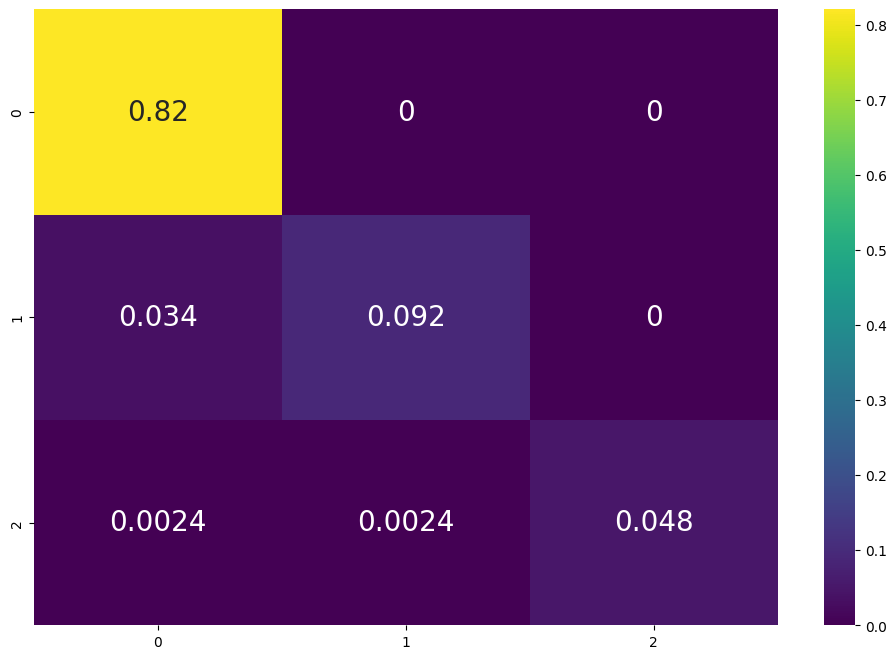

In [33]:
# Getting the Confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred_random_forest)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='viridis',annot = True, annot_kws = {'size':20})
plt.show()

# Mengimport model Ke pickle

In [34]:
import pickle

In [38]:
with open('rf_pickle','wb') as r:
  pickle.dump(random_forest,r)

In [39]:
with open('rf_pickle','rb') as r:
  rfp = pickle.load(r)

In [41]:
pred_random_forest = random_forest_mod.predict(X_test)

round(accuracy_score(y_test, pred_random_forest),3)

0.952